In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [3]:

import io 
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


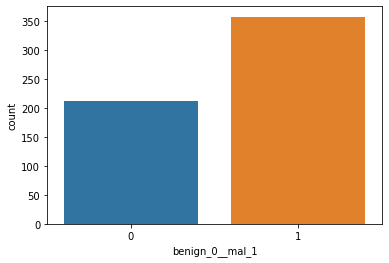

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

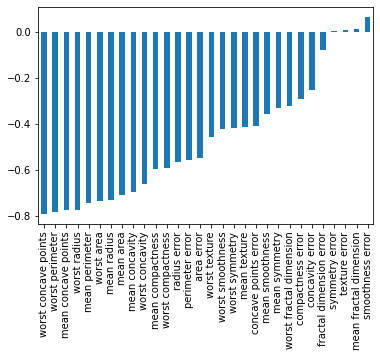

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

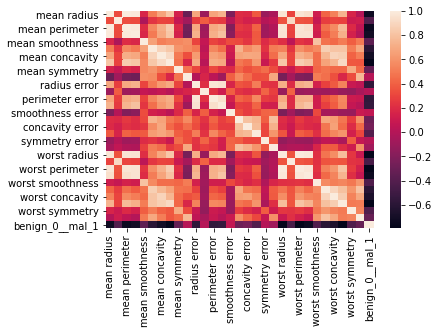

In [14]:
sns.heatmap(df.corr())

In [15]:
X=df.drop('benign_0__mal_1',axis=1).values

In [16]:
y=df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
X_train.shape

(426, 30)

In [25]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [28]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6809 - val_loss: 0.6643
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6546 - val_loss: 0.6404
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6256 - val_loss: 0.6100
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5892 - val_loss: 0.5673
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5419 - val_loss: 0.5150
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4882 - val_loss: 0.4605
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4364 - val_loss: 0.4078
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3876 - val_loss: 0.3593
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3445 - val_loss: 0.3165
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3069 - val_loss: 0.2813
Epoch 11

In [29]:
losses=pd.DataFrame(model.history.history)

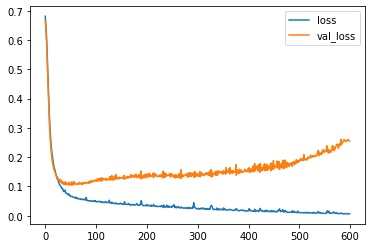

In [30]:
losses.plot()

In [31]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [34]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6824 - val_loss: 0.6654
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6480 - val_loss: 0.6323
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6135 - val_loss: 0.5945
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5747 - val_loss: 0.5529
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5309 - val_loss: 0.5062
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4835 - val_loss: 0.4543
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4338 - val_loss: 0.4035
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3849 - val_loss: 0.3553
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3403 - val_loss: 0.3141
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3031 - val_loss: 0.2769
Epoch 11

In [35]:
losses=pd.DataFrame(model.history.history)

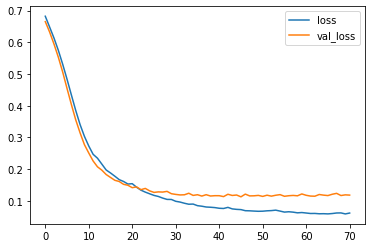

In [36]:
losses.plot()

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model=Sequential()
model.add(Dense(30,activation='relu'))

model.add(Dropout(.5))

model.add(Dense(15,activation='relu'))

model.add(Dropout(.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [39]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7114 - val_loss: 0.6882
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6827 - val_loss: 0.6665
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6753 - val_loss: 0.6497
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6599 - val_loss: 0.6338
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6440 - val_loss: 0.6218
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6339 - val_loss: 0.6076
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6043 - val_loss: 0.5868
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6119 - val_loss: 0.5664
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5791 - val_loss: 0.5400
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5537 - val_loss: 0.5091
Epoch 11/

In [40]:
losses=pd.DataFrame(model.history.history)

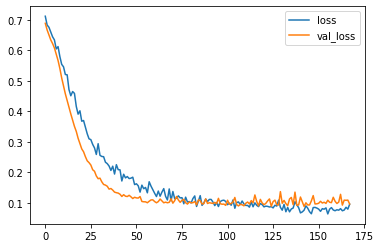

In [41]:
losses.plot()

In [43]:
predictions=model.predict_classes(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [47]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
